In [1]:
using QuadGK,LaTeXStrings,LinearAlgebra,BenchmarkTools;
using Plots;
import NLsolve,Roots;
pyplot(frame=:box,size=(500,350));

In [2]:
include("./libs/constants.jl");
include("./libs/potential.jl");

In [3]:
# ----------------------------------------------------------DD*----------------------------------------------------#
function potential_DnDsc(E,p, q; I=0, a=0,a1=1.0, cl=:ss)
    q01, q02 = q0f(E, mDn, mDsc, mDn, mDsc), q0f(E, mDn, mDsc, mDsc, mDn)
    res = zero(ComplexF64)
#     res += -β^2 * gV^2 * (1 - q01^2 / mρn^2) / sqrt(16) * pwa_central(p, q, mρn^2 - q01^2; cl=cl)
#     res += β^2 * gV^2 * (1 - q01^2 / mω^2) / sqrt(16) * pwa_central(p, q, mω^2 - q01^2; cl=cl)
#     res += -4 * gs^2 / sqrt(16) * pwa_central(p, q, mσ^2 - q01^2; cl=cl)
#     res += -4 * g^2 / fπ^2 / sqrt(16) * (pwa_tensor_deform(p, q, mπc^2 - q02^2; cl=cl) - a1 / 3 * pwa_contact(p, q, mπc^2 - q02^2; cl=cl)) * (I - 1 / 2) * 2
#     res += ((2 * sqrt(2) * gV * gλ)^2 / sqrt(16) * (pwa_tensor(p, q, mρc^2 - q02^2; cl=cl) + 2 * a / 3 * pwa_contact(p, q, mρc^2 - q02^2; cl=cl)
#                                                     -
#                                                     pwa_square(p, q, mρc^2 - q02^2; cl=cl)) * (I - 1 / 2) * 2)
    res += -β^2 * gV^2 * (1 - q01^2 / mJψ^2) / sqrt(16) * pwa_central(p, q, mJψ^2 - q01^2; cl=cl) * (-2)
    return res
end

function potential_DcDsn(E,p, q; I=0, a=0,a1=1.0, cl=:ss)
    q01, q02 = q0f(E, mDc, mDsn, mDc, mDsn), q0f(E, mDc, mDsn, mDsn, mDc)
    res = zero(ComplexF64)

#     res += -β^2 * gV^2 * (1 - q01^2 / mρn^2) / sqrt(16) * pwa_central(p, q, mρn^2 - q01^2; cl=cl)
#     res += β^2 * gV^2 * (1 - q01^2 / mω^2) / sqrt(16) * pwa_central(p, q, mω^2 - q01^2; cl=cl)
#     res += -4 * gs^2 / sqrt(16) * pwa_central(p, q, mσ^2 - q01^2; cl=cl)
#     res += -4 * g^2 / fπ^2 / sqrt(16) * (pwa_tensor_deform(p, q, mπc^2 - q02^2; cl=cl) - a1 / 3 * pwa_contact(p, q, mπc^2 - q02^2; cl=cl)) * (I - 1 / 2) * 2
#     res += ((2 * sqrt(2) * gV * gλ)^2 / sqrt(16) * (pwa_tensor(p, q, mρc^2 - q02^2; cl=cl) + 2 * a / 3 * pwa_contact(p, q, mρc^2 - q02^2; cl=cl)
#                                                     -
#                                                     pwa_square(p, q, mρc^2 - q02^2; cl=cl)) * (I - 1 / 2) * 2)
    res += -β^2 * gV^2 * (1 - q01^2 / mJψ^2) / sqrt(16) * pwa_central(p, q, mJψ^2 - q01^2; cl=cl) * (-2)
    return res
end

function potential_DDscross(E,p, q; I=0, a=0,a1=1.0, cl=:ss)
    q01, q02 = q0f(E, mDn, mDsc, mDc, mDsn), q0f(E, mDn, mDsc, mDsn, mDc)
    res = zero(ComplexF64)

    res += 2 * β^2 * gV^2 * (1 - q01^2 / mρc^2) / sqrt(16) * pwa_central(p, q, mρc^2 - q01^2; cl=cl)
#     res += 2 * g^2 / fπ^2 / sqrt(16) * (pwa_tensor_deform(p, q, mπn^2 - q02^2; cl=cl) - a1 / 3 * pwa_contact(p, q, mπn^2 - q02^2; cl=cl)) * (I - 1 / 2) * 2
#     res += -2 * g^2 / (3fπ^2) / sqrt(16) * (pwa_tensor(p, q, mη^2 - q02^2; cl=cl) - a / 3 * pwa_contact(p, q, mη^2 - q02^2; cl=cl)) * (I - 1 / 2) * 2
#     res += (-(2 * gV * gλ)^2 / sqrt(16) * (pwa_tensor(p, q, mρn^2 - q02^2; cl=cl) + 2 * a / 3 * pwa_contact(p, q, mρn^2 - q02^2; cl=cl)
#                                            -
#                                            pwa_square(p, q, mρn^2 - q02^2; cl=cl)) * (I - 1 / 2) * 2)
#     res += ((2 * gV * gλ)^2 / sqrt(16) * (pwa_tensor(p, q, mω^2 - q02^2; cl=cl) + 2 * a / 3 * pwa_contact(p, q, mω^2 - q02^2; cl=cl)
#                                           -
#                                           pwa_square(p, q, mω^2 - q02^2; cl=cl)) * (I - 1 / 2) * 2)
#     #ηc,J/ψ
#     res += 2 * g^2 / fπ^2 / sqrt(16) * (pwa_tensor(p, q, mηc^2 - q02^2; cl=cl) - a / 3 * pwa_contact(p, q, mηc^2 - q02^2; cl=cl)) * (-2) * (I - 1 / 2) * 2
#     res += (-(2 * gV * gλ)^2 / sqrt(16) * (pwa_tensor(p, q, mJψ^2 - q02^2; cl=cl) + 2 * a / 3 * pwa_contact(p, q, mJψ^2 - q02^2; cl=cl)
#                                            -
#                                            pwa_square(p, q, mJψ^2 - q02^2; cl=cl)) * (I - 1 / 2) * 2*(-2))
    return res
end

potential_DDscross (generic function with 1 method)

In [4]:
# quadgk for pion-exchange
include("./libs/pwa.jl");

the quadrature not good for 1/(z-z0)

In [3]:
# # quadrature for pion-exchange
# include("./libs/pwa_quadrature.jl");
# using Main.pwaquadrature;

In [5]:
function quadgauss(f, x::T, w::T) where {T<:Vector{Float64}}
    res = zero(f(x[1]))  # zero of the same type as f(x[1]), to avoid type instability
    for i in eachindex(x)
        res += f(x[i]) * w[i]
    end
    return res
end

λf(x, y, z) = x^2 + y^2 + z^2 - 2 * x * y - 2 * x * z - 2 * y * z
q0f(E, m1, m2, m3, m4) = abs(m3^2 - m4^2 - m1^2 + m2^2) / (2 * E)
μf(m1, m2) = m1 * m2 / (m1 + m2)

# redefine sqrt so that its cut is along the positive x axis
function xsqrt(x)
    imag(x) >=0 ? sqrt(x+0im) : -sqrt(x-0im)
end
xsqrt1(x)= (imag(x)<0&&real(x)>0) ? -xsqrt(x) : xsqrt(x)

xsqrt1 (generic function with 1 method)

# width of $D^*$

In [6]:
function Γf(E,q,m1,m2,m3,m12)
    E1=E+m12-sqrt(m12^2+q^2+0im)-sqrt(m3^2+q^2+0im)
    μ=(m1*m2)/(m1+m2)
    return (imag(E1)<0&&real(E1)>(m1+m2)) ? -xsqrt(2*μ*(E1-m1-m2)+0im) : xsqrt(2*μ*(E1-m1-m2)+0im)
end

function Γf3(E,q,m1,m2,m3,m12)
    E1=E+m12-sqrt(m12^2+q^2+0im)-sqrt(m3^2+q^2+0im)
    μ=(m1*m2)/(m1+m2)
    return (imag(E1)<0&&real(E1)>(m1+m2)) ? -xsqrt(2*μ*(E1-m1-m2)+0im)^3 : xsqrt(2*μ*(E1-m1-m2)+0im)^3
end

function dΓf3(E,q,m1,m2,m3,m12)
    E1=E+m12-sqrt(m12^2+q^2+0im)-sqrt(m3^2+q^2+0im)
    μ=(m1*m2)/(m1+m2)
    tmp=-3*μ*xsqrt(2*μ*(E1-m1-m2)+0im)*(q/sqrt(m12^2+q^2+0im)+q/sqrt(m3^2+q^2+0im))
    return (imag(E1)<0&&real(E1)>(m1+m2)) ? -tmp : tmp
end

dΓf3 (generic function with 1 method)

In [7]:
ΓDscf(E, p) = (ΓRDsc + g^2 * mDn / (6 * π * fπ^2 * mDsc) * Γf3(E, p, mDn, mπc, mDn,mDsc)
                                   + g^2 * mDc / (12 * π * fπ^2 * mDsc) * Γf3(E, p, mDc, mπn, mDn,mDsc))

ΓDsnf(E, p) = (ΓRDsn + g^2 * mDn / (12 * π * fπ^2 * mDsn) * Γf3(E, p, mDn, mπn, mDc,mDsn)
                                   + g^2 * mDc / (6 * π * fπ^2 * mDsn) * (Γf3(E, p, mDc, mπc, mDc,mDsn) - Γf3(mDc + mDsn, 0, mDc, mπc, mDc,mDsn)))

dΓDscf(E, p) = (g^2 * mDn / (6 * π * fπ^2 * mDsc) * dΓf3(E, p, mDn, mπc, mDn,mDsc)
                                   + g^2 * mDc / (12 * π * fπ^2 * mDsc) * dΓf3(E, p, mDc, mπn, mDn,mDsc))

dΓDsnf(E, p) = (g^2 * mDn / (12 * π * fπ^2 * mDsn) * dΓf3(E, p, mDn, mπn, mDc,mDsn)+ g^2 * mDc / (6 * π * fπ^2 * mDsn) * dΓf3(E, p, mDc, mπc, mDc,mDsn))

dΓDsnf (generic function with 1 method)

In [8]:
function find_singular(E, den; pstart = [0.01, 0.01])
    function f!(F, x)
        pr, pi = x
        tmp = den(E, pr + im * pi)
        F[1] = real(tmp)
        F[2] = imag(tmp)
    end
    sol = NLsolve.nlsolve((F, x) -> f!(F, x), pstart)
    return sol.zero[1] + im * sol.zero[2]
end

find_singular (generic function with 1 method)

In [9]:
qon_c(E)=find_singular(E, (E, p) -> E-mDn-mDsc - p^2 / (2 * μf(mDn, mDsc)) + im * ΓDscf(E, p) / 2; pstart = [reim(xsqrt1(E-mDn-mDsc + im * ΓDsc / 2))...])

qon_0(E)=find_singular(E, (E, p) -> E-mDc-mDsn - p^2 / (2 * μf(mDc, mDsn)) + im * ΓDsnf(E, p) / 2; pstart = [reim(xsqrt1(E-mDc-mDsn + im * ΓDsn / 2))...])

qon_0 (generic function with 1 method)

In [10]:
@btime qon_c(3.874)

  7.431 μs (58 allocations: 4.08 KiB)


0.0009031406050093312 + 0.04613250749939164im

In [11]:
qon_c(mDn+mDsc-360e-6-im*24e-6)|>println
qon_0(mDn+mDsc-360e-6-im*24e-6)|>println

0.0006990917686079699 + 0.026383911589114288im
6.632585092995444e-5 + 0.05770078015100248im


In [11]:
# Σf(E, p, μ, mi, mj, mk) = sqrt(2 * μf(mi, mj) * (E - mi - mj - mk - p^2 / (2 * μ)) + 0 * im)^3
# function Σf_ac(E, p, μ, mi, mj, mk; rs::Integer = 1)
#     res = zero(ComplexF64)
#     if rs == 1
#         res = Σf(E, p, μ, mi, mj, mk)
#     elseif rs == 2
#         if imag(E) == 0
#             res = Σf(E, p, μ, mi, mj, mk)
#         elseif imag(E) < 0 && real(E - mi - mj - mk - p^2 / (2 * μ)) > 0
#             res = -Σf(E, p, μ, mi, mj, mk)
#         elseif imag(E) < 0 && real(E - mi - mj - mk - p^2 / (2 * μ)) < 0
#             res = Σf(E, p, μ, mi, mj, mk)
#         else
#             res = conj(Σf_ac(conj(E), p, μ, mi, mj, mk; rs = rs))
#         end
#     end
#     return res
# end
# ΓDscf_ac(E, p; rs::Integer = 1) = (ΓRDsc + g^2 * mDn / (6 * π * fπ^2 * mDsc) * Σf_ac(E, p, μf(mDsc, mDn), mDn, mπc, mDn; rs = rs)
#                                    + g^2 * mDc / (12 * π * fπ^2 * mDsc) * Σf_ac(E, p, μf(mDsc, mDn), mDc, mπn, mDn; rs = rs))

# ΓDsnf_ac(E, p; rs::Integer = 1) = (ΓRDsn + g^2 * mDn / (12 * π * fπ^2 * mDsn) * Σf_ac(E, p, μf(mDc, mDsn), mDn, mπn, mDc; rs = rs)
#                                    + g^2 * mDc / (6 * π * fπ^2 * mDsn) * (Σf_ac(E, p, μf(mDc, mDsn), mDc, mπc, mDc; rs = rs) - Σf_ac(mDc + mDsn, 0, μf(mDc, mDsn), mDc, mπc, mDc; rs = rs)))

ΓDsnf_ac (generic function with 1 method)

# path deformation

In [12]:
xxx,www=gauss(30,0,1);

In [13]:
qi=zeros(ComplexF64,2+3*length(xxx));
wi=zeros(ComplexF64,3*length(xxx));

In [14]:
function Einner(E,q,m1,m2,m3,m12)
    return E+m12-sqrt(m12^2+q^2+0im)-sqrt(m3^2+q^2+0im)
end

Einner (generic function with 1 method)

In [15]:
function find_qint(E,m1,m2,m3,m12;rtol=1e-6)
    
#     # method 1
#     function f!(F,x)
#         q=x[1]+1.0im*x[2]
#         tmp=Einner(E,q,m1,m2,m3,m12)
#         F[1]=real(tmp)-m1-m2
#         F[2]=imag(tmp)-rtol
#     end
#     sol=NLsolve.nlsolve(f!,[0.1,-0.1])
#     return sol.zero[1]+im*sol.zero[2]
    
    # method 2
    Etmp=E+m12-m1-m2-im*rtol
    qtmp=sqrt(λf(Etmp^2,m12^2,m3^2))/(2*Etmp)
    return imag(qtmp)>0 ? -qtmp : qtmp
end

find_qint (generic function with 1 method)

In [16]:
function sol_qint3(qint1,qint2)
    
#     # method 1
#     sol=NLsolve.nlsolve((F,x)->F[1]=imag(conj(qint2-qint1)*(x[1]-qint1)),[1.0])
#     return sol.zero[1]+im*sol.zero[2]
    
    # method 2
    a,b=reim(qint1)
    c,d=reim(qint2)
    return b*(c-a)/(b-d)+a
end

sol_qint3 (generic function with 1 method)

$0\sim 0.5$, $0.5\sim 1$, $1\sim\infty$

In [17]:
f1(x)=0.5*x;
f2(x)=0.5*(1-x)+1.0*x;
f3(x)=1.0+tan(π/2*x);
df3(x)=π/2/cos(π/2*x)^2;

In [18]:
function find_qw(E;qi=qi,wi=wi,xxx=xxx,www=www)
    
    # wi is the one wrappered with g'(x)
    qi[1],qi[2]=qon_c(E),qon_0(E)
    len=length(xxx)
    if imag(E)>=0||(real(E)<=mDn+mDn+mπc)
        for i in eachindex(xxx)
            qi[2+i]=f1(xxx[i])
            qi[2+len+i]=f2(xxx[i])
            qi[2+2*len+i]=f3(xxx[i])
            wi[i]=0.5*www[i]
            wi[i+len]=0.5*www[i]
            wi[i+2*len]=df3(xxx[i])*www[i]
        end
        return nothing
    end
    
    # find closet DDπ
    qint1,qint2=zeros(ComplexF64,2)
    if real(E)>mDc+mDc+mπc
        qint1=find_qint(E,mDc,mπc,mDc,mDsn)
        qint2=find_qint(E,mDn,mπc,mDn,mDsc)
    elseif real(E)>mDc+mDn+mπn
        qint1=find_qint(E,mDc,mπn,mDn,mDsc)
        qint2=find_qint(E,mDn,mπc,mDn,mDsc)
    else
        qint1=find_qint(E,mDn,mπc,mDn,mDsc)
        qint2=2*real(qint1)
    end
    
    @assert real(qint1)>0&&imag(qint1)<0 "Wrong qint1 position!"
    @assert imag(qint2)>imag(qint1)&&imag(qint2)<=0&&real(qint2)>real(qint1) "Wrong qint2 position!"
    
#     # get points on real axis
#     # method1
#     qint3=Roots.find_zero(x->imag(conj(qint2-qint1)*(x-qint1)),(0,1))
    # method 2
    qint3=sol_qint3(qint1,qint2)
#     println(qint1)
#     println(qint2)
#     println(qint3)
    
    for i in eachindex(xxx)
        qi[2+i]=qint1*xxx[i]
        qi[2+len+i]=qint1+(qint3-qint1)*xxx[i]
        qi[2+2*len+i]=qint3+tan(π/2*xxx[i])
        wi[i]=qint1*www[i]
        wi[i+len]=(qint3-qint1)*www[i]
        wi[i+2*len]=df3(xxx[i])*www[i]
    end
    return nothing
end

find_qw (generic function with 1 method)

In [18]:
@btime find_qw(3.875)

  14.791 μs (117 allocations: 8.17 KiB)


# VGT

In [19]:
Vmat=zeros(ComplexF64,4*(2+3*length(xxx)),4*(2+3*length(xxx)));
Gmat=zeros(ComplexF64,4*(2+3*length(xxx)),4*(2+3*length(xxx)));
Tmat=zeros(ComplexF64,4*(2+3*length(xxx)),4*(2+3*length(xxx)));

In [20]:
function VMat!(E;a = 0.0,a1=0.0,Λ1=0.5,Λ2=0.5,I=0,plist=qi,des=Vmat) #checked 10.10
    find_qw(E)
    sublen=length(plist)

    for l in eachindex(plist)
        for m in eachindex(plist)
            i, j = 1, 1
            des[sublen*(i-1)+l, sublen*(j-1)+m] = (potential_DnDsc(E,plist[l], plist[m]; a = a,a1=a1,I=I, cl = :ss)*exp(-plist[l]^2/Λ1^2-plist[m]^2/Λ1^2))
            i, j = 1, 2
            des[sublen*(i-1)+l, sublen*(j-1)+m] = (potential_DnDsc(E,plist[l], plist[m]; a = a,a1=a1,I=I, cl = :ds)*exp(-plist[l]^2/Λ1^2-plist[m]^2/Λ1^2))
            i, j = 2, 1
            des[sublen*(i-1)+l, sublen*(j-1)+m] = (potential_DnDsc(E,plist[l], plist[m]; a = a,a1=a1,I=I,  cl = :sd)*exp(-plist[l]^2/Λ1^2-plist[m]^2/Λ1^2))
            i, j = 2, 2
            des[sublen*(i-1)+l, sublen*(j-1)+m] = (potential_DnDsc(E,plist[l], plist[m]; a = a,a1=a1,I=I, cl = :dd)*exp(-plist[l]^2/Λ1^2-plist[m]^2/Λ1^2))
            i, j = 1, 3
            des[sublen*(i-1)+l, sublen*(j-1)+m] = (potential_DDscross(E,plist[l], plist[m]; a = a,a1=a1,I=I,  cl = :ss)*exp(-plist[l]^2/Λ2^2-plist[m]^2/Λ1^2))
            i, j = 1, 4
            des[sublen*(i-1)+l, sublen*(j-1)+m] = (potential_DDscross(E,plist[l], plist[m]; a = a,a1=a1,I=I,  cl = :ds)*exp(-plist[l]^2/Λ2^2-plist[m]^2/Λ1^2))
            i, j = 2, 3
            des[sublen*(i-1)+l, sublen*(j-1)+m] = (potential_DDscross(E,plist[l], plist[m]; a = a,a1=a1,I=I,  cl = :sd)*exp(-plist[l]^2/Λ2^2-plist[m]^2/Λ1^2))
            i, j = 2, 4
            des[sublen*(i-1)+l, sublen*(j-1)+m] = (potential_DDscross(E,plist[l], plist[m]; a = a,a1=a1,I=I,  cl = :dd)*exp(-plist[l]^2/Λ2^2-plist[m]^2/Λ1^2))
            i, j = 3, 1
            des[sublen*(i-1)+l, sublen*(j-1)+m] = (potential_DDscross(E,plist[l], plist[m]; a = a,a1=a1,I=I,  cl = :ss)*exp(-plist[l]^2/Λ1^2-plist[m]^2/Λ2^2))
            i, j = 3, 2
            des[sublen*(i-1)+l, sublen*(j-1)+m] = (potential_DDscross(E,plist[l], plist[m]; a = a,a1=a1,I=I,  cl = :ds)*exp(-plist[l]^2/Λ1^2-plist[m]^2/Λ2^2))
            i, j = 4, 1
            des[sublen*(i-1)+l, sublen*(j-1)+m] = (potential_DDscross(E,plist[l], plist[m]; a = a,a1=a1,I=I,  cl = :sd)*exp(-plist[l]^2/Λ1^2-plist[m]^2/Λ2^2))
            i, j = 4, 2
            des[sublen*(i-1)+l, sublen*(j-1)+m] = (potential_DDscross(E,plist[l], plist[m]; a = a,a1=a1,I=I,  cl = :dd)*exp(-plist[l]^2/Λ1^2-plist[m]^2/Λ2^2))
            i, j = 3, 3
            des[sublen*(i-1)+l, sublen*(j-1)+m] = (potential_DcDsn(E,plist[l], plist[m]; a = a,a1=a1,I=I,  cl = :ss)*exp(-plist[l]^2/Λ2^2-plist[m]^2/Λ2^2))
            i, j = 3, 4
            des[sublen*(i-1)+l, sublen*(j-1)+m] = (potential_DcDsn(E,plist[l], plist[m]; a = a,a1=a1,I=I,  cl = :ds)*exp(-plist[l]^2/Λ2^2-plist[m]^2/Λ2^2))
            i, j = 4, 3
            des[sublen*(i-1)+l, sublen*(j-1)+m] = (potential_DcDsn(E,plist[l], plist[m]; a = a,a1=a1,I=I,  cl = :sd)*exp(-plist[l]^2/Λ2^2-plist[m]^2/Λ2^2))
            i, j = 4, 4
            des[sublen*(i-1)+l, sublen*(j-1)+m] = (potential_DcDsn(E,plist[l], plist[m]; a = a,a1=a1,I=I,  cl = :dd)*exp(-plist[l]^2/Λ2^2-plist[m]^2/Λ2^2))
        end
    end
    return nothing
end

# function VMat!(E;a = 0.0,a1=0.0,Λ1=0.5,Λ2=0.5,I=0,plist=qi,des=Vmat) #checked 10.10
#     find_qw(E)
#     sublen=length(plist)

#     for l in eachindex(plist)
#         for m in eachindex(plist)
#             i, j = 1, 1
#             des[sublen*(i-1)+l, sublen*(j-1)+m] = (potential_DnDsc(E,plist[l], plist[m]; a = a,a1=a1,I=I, cl = :ss)*exp(-abs(plist[l])^2/Λ1^2-abs(plist[m])^2/Λ1^2))
#             i, j = 1, 2
#             des[sublen*(i-1)+l, sublen*(j-1)+m] = (potential_DnDsc(E,plist[l], plist[m]; a = a,a1=a1,I=I, cl = :ds)*exp(-abs(plist[l])^2/Λ1^2-abs(plist[m])^2/Λ1^2))
#             i, j = 2, 1
#             des[sublen*(i-1)+l, sublen*(j-1)+m] = (potential_DnDsc(E,plist[l], plist[m]; a = a,a1=a1,I=I,  cl = :sd)*exp(-abs(plist[l])^2/Λ1^2-abs(plist[m])^2/Λ1^2))
#             i, j = 2, 2
#             des[sublen*(i-1)+l, sublen*(j-1)+m] = (potential_DnDsc(E,plist[l], plist[m]; a = a,a1=a1,I=I, cl = :dd)*exp(-abs(plist[l])^2/Λ1^2-abs(plist[m])^2/Λ1^2))
#             i, j = 1, 3
#             des[sublen*(i-1)+l, sublen*(j-1)+m] = (potential_DDscross(E,plist[l], plist[m]; a = a,a1=a1,I=I,  cl = :ss)*exp(-abs(plist[l])^2/Λ2^2-abs(plist[m])^2/Λ1^2))
#             i, j = 1, 4
#             des[sublen*(i-1)+l, sublen*(j-1)+m] = (potential_DDscross(E,plist[l], plist[m]; a = a,a1=a1,I=I,  cl = :ds)*exp(-abs(plist[l])^2/Λ2^2-abs(plist[m])^2/Λ1^2))
#             i, j = 2, 3
#             des[sublen*(i-1)+l, sublen*(j-1)+m] = (potential_DDscross(E,plist[l], plist[m]; a = a,a1=a1,I=I,  cl = :sd)*exp(-abs(plist[l])^2/Λ2^2-abs(plist[m])^2/Λ1^2))
#             i, j = 2, 4
#             des[sublen*(i-1)+l, sublen*(j-1)+m] = (potential_DDscross(E,plist[l], plist[m]; a = a,a1=a1,I=I,  cl = :dd)*exp(-abs(plist[l])^2/Λ2^2-abs(plist[m])^2/Λ1^2))
#             i, j = 3, 1
#             des[sublen*(i-1)+l, sublen*(j-1)+m] = (potential_DDscross(E,plist[l], plist[m]; a = a,a1=a1,I=I,  cl = :ss)*exp(-abs(plist[l])^2/Λ1^2-abs(plist[m])^2/Λ2^2))
#             i, j = 3, 2
#             des[sublen*(i-1)+l, sublen*(j-1)+m] = (potential_DDscross(E,plist[l], plist[m]; a = a,a1=a1,I=I,  cl = :ds)*exp(-abs(plist[l])^2/Λ1^2-abs(plist[m])^2/Λ2^2))
#             i, j = 4, 1
#             des[sublen*(i-1)+l, sublen*(j-1)+m] = (potential_DDscross(E,plist[l], plist[m]; a = a,a1=a1,I=I,  cl = :sd)*exp(-abs(plist[l])^2/Λ1^2-abs(plist[m])^2/Λ2^2))
#             i, j = 4, 2
#             des[sublen*(i-1)+l, sublen*(j-1)+m] = (potential_DDscross(E,plist[l], plist[m]; a = a,a1=a1,I=I,  cl = :dd)*exp(-abs(plist[l])^2/Λ1^2-abs(plist[m])^2/Λ2^2))
#             i, j = 3, 3
#             des[sublen*(i-1)+l, sublen*(j-1)+m] = (potential_DcDsn(E,plist[l], plist[m]; a = a,a1=a1,I=I,  cl = :ss)*exp(-abs(plist[l])^2/Λ2^2-abs(plist[m])^2/Λ2^2))
#             i, j = 3, 4
#             des[sublen*(i-1)+l, sublen*(j-1)+m] = (potential_DcDsn(E,plist[l], plist[m]; a = a,a1=a1,I=I,  cl = :ds)*exp(-abs(plist[l])^2/Λ2^2-abs(plist[m])^2/Λ2^2))
#             i, j = 4, 3
#             des[sublen*(i-1)+l, sublen*(j-1)+m] = (potential_DcDsn(E,plist[l], plist[m]; a = a,a1=a1,I=I,  cl = :sd)*exp(-abs(plist[l])^2/Λ2^2-abs(plist[m])^2/Λ2^2))
#             i, j = 4, 4
#             des[sublen*(i-1)+l, sublen*(j-1)+m] = (potential_DcDsn(E,plist[l], plist[m]; a = a,a1=a1,I=I,  cl = :dd)*exp(-abs(plist[l])^2/Λ2^2-abs(plist[m])^2/Λ2^2))
#         end
#     end
#     return nothing
# end

VMat! (generic function with 1 method)

In [20]:
@btime VMat!(3.875)

  915.931 ms (5389842 allocations: 318.47 MiB)


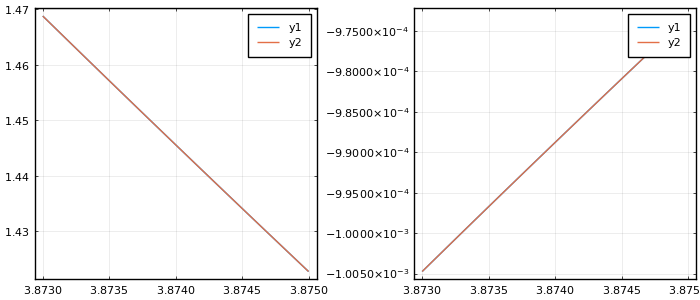

In [21]:
let Ev=collect(3.873:0.0001:mDn+mDsc-eps())
    function tmpf(E)
        VMat!(E)
        Vmat[1,1]
    end
    
    resv1=[tmpf(e+im*eps()) for e in Ev]
    resv2=[tmpf(e-im*eps()) for e in Ev]
    p1=plot(Ev,real.(resv1))
    plot!(Ev,real.(resv2))
    p2=plot(Ev,imag.(resv1))
    plot!(Ev,imag.(resv2))
    plot(p1,p2,layout=(1,2),size=(700,300))
end

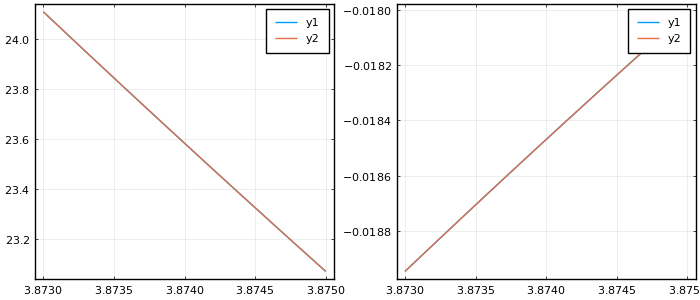

In [23]:
let Ev=collect(3.873:0.0001:mDn+mDsc-eps())
    function tmpf(E)
        VMat!(E)
        Vmat[2,1+2*length(qi)]
    end
    
    resv1=[tmpf(e+im*eps()) for e in Ev]
    resv2=[tmpf(e-im*eps()) for e in Ev]
    p1=plot(Ev,real.(resv1))
    plot!(Ev,real.(resv2))
    p2=plot(Ev,imag.(resv1))
    plot!(Ev,imag.(resv2))
    plot(p1,p2,layout=(1,2),size=(700,300))
end

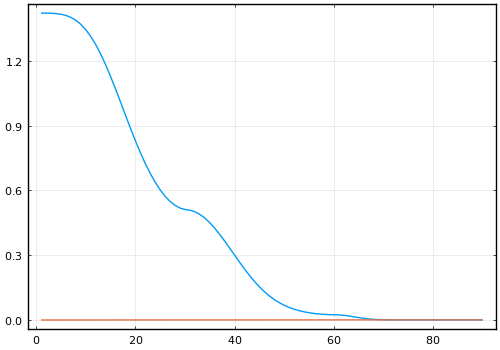

In [53]:
VMat!(3.875;Λ1=0.5)
plot(real.(vec(Vmat[1:1,3:length(qi)])),label=false)
plot!(imag.(vec(Vmat[1:1,3:length(qi)])),label=false)

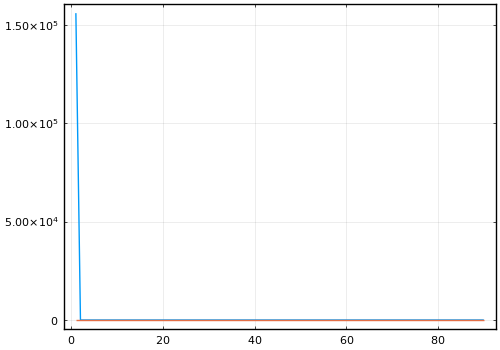

In [57]:
VMat!(3.875;Λ1=0.5)
plot(real.(diag(Vmat)[3+length(qi):2*length(qi)]),label=false)
plot!(imag.(diag(Vmat)[3+length(qi):2*length(qi)]),label=false)

In [60]:
diag(Vmat)[3+length(qi):2*length(qi)]

90-element Vector{ComplexF64}:
      155913.95322913723 + 0.0im
       4.849417368850508 + 0.0im
   -0.033010786916781804 + 0.0im
    0.000794225709159556 + 0.0im
 -0.00020751670241786916 + 0.0im
   1.0288671643414412e-5 + 0.0im
   2.2088857312450557e-6 + 0.0im
     3.63078999366083e-8 + 0.0im
    6.219958462559854e-7 + 0.0im
   1.3118800613751027e-6 + 0.0im
   2.5488972372270073e-6 + 0.0im
    4.506529560772152e-6 + 0.0im
    7.362292178771686e-6 + 0.0im
                         ⋮
  3.0241422642781783e-29 + 0.0im
  1.1393690250630046e-36 + 0.0im
  1.0858478484439438e-47 + 0.0im
    6.49008468632186e-65 + 0.0im
  1.3684201461133767e-93 + 0.0im
 2.6675641774782002e-145 + 0.0im
  9.727640164822447e-249 + 0.0im
                     0.0 + 0.0im
                     0.0 + 0.0im
                     0.0 + 0.0im
                     0.0 + 0.0im
                     0.0 + 0.0im

In [61]:
diag(Vmat)[3:length(qi)]

90-element Vector{ComplexF64}:
      1.4205433667677163 + 0.0im
      1.4203560213776103 + 0.0im
      1.4193860870685326 + 0.0im
      1.4165866402174188 + 0.0im
      1.4105344255624253 + 0.0im
       1.399537766693325 + 0.0im
      1.3817879806810425 + 0.0im
      1.3555517236164676 + 0.0im
      1.3193910906394846 + 0.0im
      1.2723859437144758 + 0.0im
      1.2143227594583081 + 0.0im
      1.1458109624304036 + 0.0im
       1.068294851210073 + 0.0im
                         ⋮
  4.6490276617512375e-28 + 0.0im
  1.3940315997672466e-35 + 0.0im
  1.0498217902063444e-46 + 0.0im
   4.929297478074593e-64 + 0.0im
   8.135552344197141e-93 + 0.0im
 1.2412229368189067e-144 + 0.0im
  3.558054323252316e-248 + 0.0im
                     0.0 + 0.0im
                     0.0 + 0.0im
                     0.0 + 0.0im
                     0.0 + 0.0im
                     0.0 + 0.0im

In [67]:
potential_DnDsc(3.875,qi[3],qi[3];cl=:dd)

0.0007766289813376237 + 0.0im
0.0007766289813376237 + 0.0im
9.590789610000002


155914.7055501708 + 0.0im

In [66]:
function pwa_central(p, q, usq; cl = :ss)
    println(p)
    println(q)
    println(usq)
    ξ = (p^2 + q^2 + usq) / (2 * p * q)
    tmp = zero(ComplexF64)
    if cl == :ss
        if iszero(p) || iszero(q)
            tmp = 1 / (p^2 + q^2 + usq)
        else
            tmp = -1 / (4 * p * q) *(log(1-ξ)-log(-1-ξ))
        end
    elseif cl == :dd
        if iszero(p) || iszero(q)
            tmp = 0
        else
            tmp = -1 / (8 * p * q) * (6 * ξ + (-1 + 3 * ξ^2) *(log(1-ξ)-log(-1-ξ)))
        end
    end
    return tmp
end

pwa_central (generic function with 1 method)

In [68]:
let p=0.0007766289813376237 + 0.0im,q=0.0007766289813376237 + 0.0im,usq=9.590789610000002
    quadgk(z->1/4*(3z^2-1)/(p^2+q^2-2*p*q*z+usq),-1,1)
end

(2.203098814490545e-16 + 0.0im, 0.0)

In [75]:
let p=0.0007766289813376237 + 0.0im,q=0.0007766289813376237 + 0.0im,usq=9.590789610000002
    ξ = (p^2 + q^2 + usq) / (2 * p * q)
    quadgk(z->-1/(8*p*q)*(3z+3ξ+(3ξ^2-1)/(z-ξ)),-1,1)
end

(0.00021572754360784892 + 0.0im, 3.360776938121337e-5)

In [77]:
let p=BigFloat(0.0007766289813376237),q=BigFloat(0.0007766289813376237),usq=BigFloat(9.590789610000002)
    ξ = BigFloat((p^2 + q^2 + usq) / (2 * p * q))
    quadgk(z->-1/(8*p*q)*(3z+3ξ+(3ξ^2-1)/(z-ξ)),-1,1)
end

(2.19932699810886503170211307110766351445964942888649562920339828391007119099494e-16, 1.670859878465200253145278173775560904493529582977301086635071132852133765523121e-18)

In [71]:
let p=0.0007766289813376237 + 0.0im,q=0.0007766289813376237 + 0.0im,usq=9.590789610000002
    
    ξ = (p^2 + q^2 + usq) / (2 * p * q)
    println(ξ)
    -1 / (8 * p * q) * (6 * ξ + (-1 + 3 * ξ^2) *(log(1-ξ)-log(-1-ξ)))
end

7.950551170087141e6 + 0.0im


11443.953079826395 - 0.0im

In [79]:
let p=0.0007766289813376237 + 0.0im,q=0.0007766289813376237 + 0.0im,usq=9.590789610000002
    
    ξ = (p^2 + q^2 + usq) / (2 * p * q)
    println(ξ)
    -1 / (8 * p * q) * (6 * ξ + (-1 + 3 * ξ^2) *(log(1-ξ)-log(-1-ξ)))
end

7.950551170087141e6 + 0.0im


11443.953079826395 - 0.0im

In [81]:
let p=0.0007766289813376237 + 0.0im,q=0.0007766289813376237 + 0.0im,usq=9.590789610000002
    
    ξ = BigFloat((p^2 + q^2 + usq) / (2 * p * q))
    println(ξ)
    -1 / (8 * p * q) * (6 * ξ + (-1 + 3 * ξ^2) *(log((ξ-1)/(ξ+1))))
end

7.950551170087140984833240509033203125e+06


2.199327191781943749787738925700574924161133241973812550557363012337833254868025e-16 - 0.0im

In [78]:
let p=BigFloat(0.0007766289813376237),q=BigFloat(0.0007766289813376237),usq=BigFloat(9.590789610000002)
    
    ξ = BigFloat((p^2 + q^2 + usq) / (2 * p * q))
    println(ξ)
    -1 / (8 * p * q) * (6 * ξ + (-1 + 3 * ξ^2) *(log(ξ-1)-log(1+ξ)))
end

7.950551170087140337789962292043305930493605779978933346737523937424530851639073e+06


2.199327191781944315072781159168004537108394822664630834899515387612385674105915e-16

In [72]:
let p=0.0007766289813376237 + 0.0im,q=0.0007766289813376237 + 0.0im,usq=9.590789610000002
    
    ξ = (p^2 + q^2 + usq) / (2 * p * q)
    println(ξ)
    -1 / (8 * p * q) * (6 * ξ + (-1 + 3 * ξ^2) *(log(-(1-ξ)/(1+ξ))))
end

7.950551170087141e6 + 0.0im


2661.3477021623303 - 0.0im

In [21]:
Gc(E,q)=1/(2π^2)/(E-mDn-mDsc-q^2/(2*μf(mDn,mDsc))+im*ΓDscf(E,q)/2)
Gn(E,q)=1/(2π^2)/(E-mDc-mDsn-q^2/(2*μf(mDc,mDsn))+im*ΓDsnf(E,q)/2)

Gn (generic function with 1 method)

In [22]:
function GMat!(E;qi=qi,wi=wi,des=Gmat)
    find_qw(E)
    sublen=length(qi)
    μ1,μ2=μf(mDn,mDsc),μf(mDc,mDsn)
    k1,k2=qi[1],qi[2]
    
    tmp=zero(ComplexF64)
    
    for i in 1:2
        tmp=0.0+0.0im
        for j in eachindex(wi)
            tmp+=-wi[j]*k1^2*Gc(E,qi[2+j])
            des[(i-1)*sublen+2+j,(i-1)*sublen+2+j]=wi[j]*qi[2+j]^2*Gc(E,qi[2+j])
        end
        tmp+=im/(2π)*k1^2/(-k1/μ1+im*dΓDscf(E,k1)/2)
        des[(i-1)*sublen+1,(i-1)*sublen+1]=tmp
    end
    
    for i in 3:4
        tmp=0.0+0.0im
        for j in eachindex(wi)
            tmp-=wi[j]*k2^2*Gn(E,qi[2+j])
            des[(i-1)*sublen+2+j,(i-1)*sublen+2+j]=wi[j]*qi[2+j]^2*Gn(E,qi[2+j])
        end
        tmp+=im/(2π)*k2^2/(-k2/μ2+im*dΓDsnf(E,k2)/2)
        des[(i-1)*sublen+2,(i-1)*sublen+2]=tmp
    end
    
    return nothing
end

GMat! (generic function with 1 method)

In [23]:
@btime GMat!(3.875)

  107.375 μs (118 allocations: 8.19 KiB)


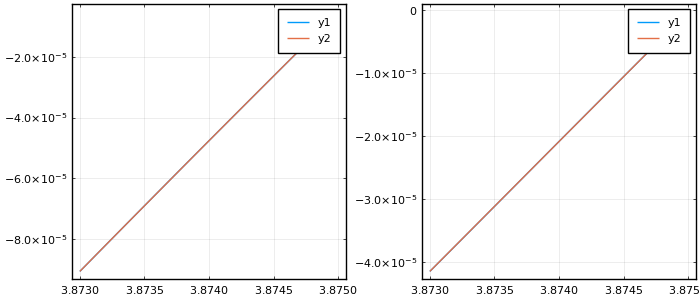

In [24]:
let Ev=collect(3.873:0.0001:mDn+mDsc-eps())
    function tmpf(E)
        GMat!(E)
        Gmat[1,1]
    end
    resv1=[tmpf(e+im*eps()) for e in Ev]
    resv2=[tmpf(e-im*eps()) for e in Ev]

    p1=plot(Ev,real.(resv1))
    plot!(Ev,real.(resv2))
    p2=plot(Ev,imag.(resv1))
    plot!(Ev,imag.(resv2))
    plot(p1,p2,layout=(1,2),size=(700,300))
end

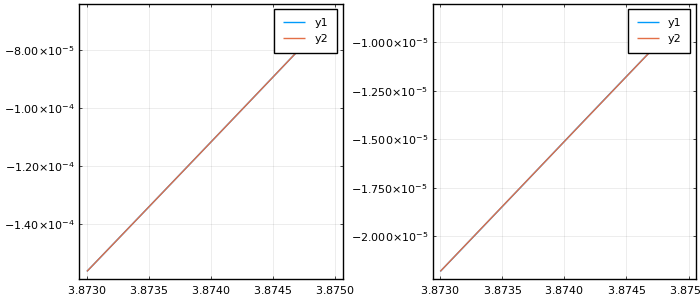

In [25]:
let Ev=collect(3.873:0.0001:mDn+mDsc-eps())
    function tmpf(E)
        GMat!(E)
        Gmat[2+2*length(qi),2+2*length(qi)]
    end
    resv1=[tmpf(e+im*eps()) for e in Ev]
    resv2=[tmpf(e-im*eps()) for e in Ev]

    p1=plot(Ev,real.(resv1))
    plot!(Ev,real.(resv2))
    p2=plot(Ev,imag.(resv1))
    plot!(Ev,imag.(resv2))
    plot(p1,p2,layout=(1,2),size=(700,300))
end

In [23]:
function detVG(E;a = 0.0,a1=0.0,Λ1=0.5,Λ2=0.5,I=0)
    VMat!(E;a=a,a1=a1,Λ1=Λ1,Λ2=Λ2,I=I)
    GMat!(E)
    return det(LinearAlgebra.I-Vmat*Gmat)
end

detVG (generic function with 1 method)

In [24]:
function TMat!(E;a = 0.0,a1=0.0,Λ1=0.5,Λ2=0.5,I=0,des=Tmat)
    VMat!(E;a=a,a1=a1,Λ1=Λ1,Λ2=Λ2,I=I)
    GMat!(E)
    des .=inv(LinearAlgebra.I-Vmat*Gmat)*Vmat
    return nothing
end

TMat! (generic function with 1 method)

In [28]:
@btime detVG(3.875)

  52.221 ms (248 allocations: 6.22 MiB)


0.8847530544632297 + 0.011217133255251565im

In [29]:
@btime TMat!(3.875)

  62.176 ms (254 allocations: 8.64 MiB)


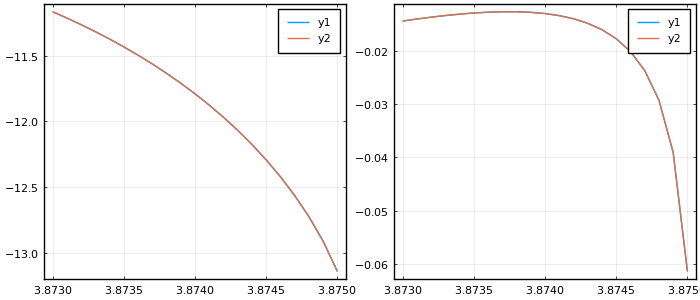

In [30]:
let Ev=collect(3.873:0.0001:mDn+mDsc-eps())
    function tmpf(E)
        TMat!(E)
        Tmat[1,1]
    end
    
    resv1=[tmpf(e+im*eps()) for e in Ev]
    resv2=[tmpf(e-im*eps()) for e in Ev]
    p1=plot(Ev,real.(resv1))
    plot!(Ev,real.(resv2))
    p2=plot(Ev,imag.(resv1))
    plot!(Ev,imag.(resv2))
    plot(p1,p2,layout=(1,2),size=(700,300))
end

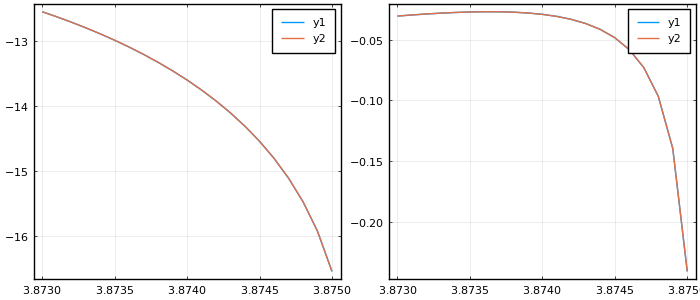

In [31]:
let Ev=collect(3.873:0.0001:mDn+mDsc-eps())
    function tmpf(E)
        TMat!(E)
        Tmat[2+2*length(qi),2+2*length(qi)]
    end
    
    resv1=[tmpf(e+im*eps()) for e in Ev]
    resv2=[tmpf(e-im*eps()) for e in Ev]
    p1=plot(Ev,real.(resv1))
    plot!(Ev,real.(resv2))
    p2=plot(Ev,imag.(resv1))
    plot!(Ev,imag.(resv2))
    plot(p1,p2,layout=(1,2),size=(700,300))
end

# parameters optimization

In [25]:
using Optim;

In [27]:
function inv_abst(x;E=mDn+mDsc-273e-6,I=0)
    TMat!(E;a=x[1],a1=1.0,Λ1=x[2],Λ2=x[3],I=I)
    return 1/abs(Tmat[1,1])
end

inv_abst (generic function with 1 method)

In [30]:
function absdet(x;E=mDn+mDsc-360e-6-im*24e-6,I=0)
    abs(detVG(E;a=x[1],a1=1.0,Λ1=x[2],Λ2=x[3],I=I))
end

absdet (generic function with 1 method)

## Test1:no pion

### same $\Lambda$ and a=0.0

In [34]:
let 
#     tmpf(x)=inv_abst([0.0,x[1],x[1]])
    tmpf(x)=absdet([0.0,x[1],x[1]];I=1)
    init_val=[0.6]
    lower=[0.3]
    upper=[2.0]
    res=Optim.optimize(tmpf,lower,upper,init_val)
    println(Optim.minimum(res))
    println(Optim.minimizer(res))
end

0.13255043781168485
[1.9750831364810006]


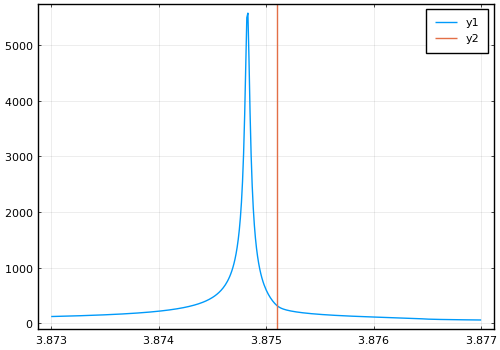

In [38]:
let Ev=collect(3.873:0.00001:3.877)
    function tmpf(E)
        TMat!(E;a=0.0,Λ1=1.8561901643569838,Λ2=1.8561901643569838,I=0)
        abs(Tmat[1,1])
    end
    resv=[tmpf(e) for e in Ev]
    plot(Ev,resv)
    vline!([mDn+mDsc])
end

In [52]:
let 
    tmpf(x)=inv_abst([0.0,x[1],x[1]];I=0)
    init_val=[0.6]
    lower=[0.3]
    upper=[2.0]
    res=Optim.optimize(tmpf,lower,upper,init_val)
    println(Optim.minimum(res))
    println(Optim.minimizer(res))
end
#0.9561618779271188 : jpsi&I=1
#0.858478497469796 : no jpsi&I=1
#1.557322675517814 : no jpsi&I=0
#1.8561901643569838 : jpsi&I=0

0.00017663497155851723
[1.557322675517814]


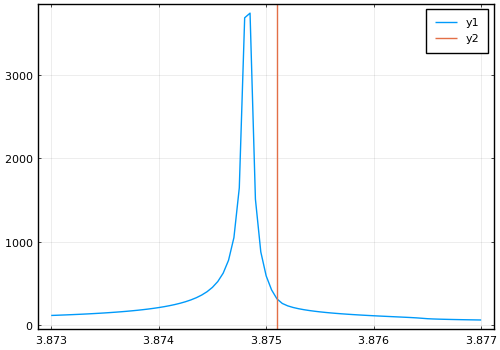

In [48]:
let Ev=collect(3.873:0.00005:3.877)
    function tmpf(E)
        TMat!(E;a=0.0,Λ1=0.858478497469796,Λ2=0.858478497469796,I=1)
        abs(Tmat[1,1])
    end
    resv=[tmpf(e) for e in Ev]
    plot(Ev,resv)
    vline!([mDn+mDsc])
end

### same $\Lambda$ and 0-a-1

In [55]:
let 
    tmpf(x)=inv_abst([x[1],x[2],x[2]];I=0)
    init_val=[0.01,0.5]
    lower=[0.0,0.3]
    upper=[1.0,2.0]
    res=Optim.optimize(tmpf,lower,upper,init_val)
    println(Optim.minimum(res))
    println(Optim.minimizer(res))
end

0.00017276235890662588
[0.9999999997589334, 0.8949795727882751]


In [ ]:
0.8584784976360713

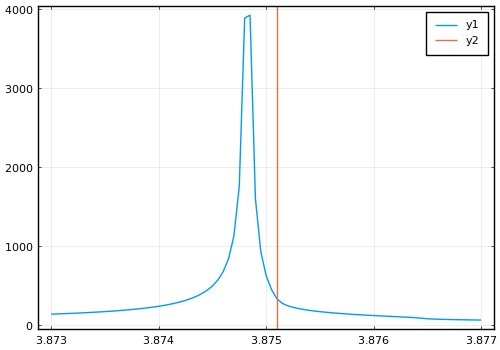

In [50]:
let Ev=collect(3.873:0.00005:3.877)
    function tmpf(E)
        TMat!(E;a=0.9999999997589334,Λ1=0.8949795727882751,Λ2=0.8949795727882751,I=0)
        abs(Tmat[1,1])
    end
    resv=[tmpf(e) for e in Ev]
    plot(Ev,resv)
    vline!([mDn+mDsc])
end

# Test

In [81]:
# ----------------------------------------------------------DD*----------------------------------------------------#
function potential_DnDsc(E,p, q; I=0, a=0,a1=1.0, cl=:ss)
    q01, q02 = q0f(E, mDn, mDsc, mDn, mDsc), q0f(E, mDn, mDsc, mDsc, mDn)
    res = zero(ComplexF64)
#     res += -β^2 * gV^2 * (1 - q01^2 / mρn^2) / sqrt(16) * pwa_central(p, q, mρn^2 - q01^2; cl=cl)
#     res += β^2 * gV^2 * (1 - q01^2 / mω^2) / sqrt(16) * pwa_central(p, q, mω^2 - q01^2; cl=cl)
#     res += -4 * gs^2 / sqrt(16) * pwa_central(p, q, mσ^2 - q01^2; cl=cl)
#     res += -4 * g^2 / fπ^2 / sqrt(16) * (pwa_tensor_deform(p, q, mπc^2 - q02^2; cl=cl) - a1 / 3 * pwa_contact(p, q, mπc^2 - q02^2; cl=cl)) * (I - 1 / 2) * 2
#     res += ((2 * sqrt(2) * gV * gλ)^2 / sqrt(16) * (pwa_tensor(p, q, mρc^2 - q02^2; cl=cl) + 2 * a / 3 * pwa_contact(p, q, mρc^2 - q02^2; cl=cl)
#                                                     -
#                                                     pwa_square(p, q, mρc^2 - q02^2; cl=cl)) * (I - 1 / 2) * 2)
    res += -β^2 * gV^2 * (1 - q01^2 / mJψ^2) / sqrt(16) * pwa_central(p, q, mJψ^2 - q01^2; cl=cl) * (-2)
    return res
end

function potential_DcDsn(E,p, q; I=0, a=0,a1=1.0, cl=:ss)
    q01, q02 = q0f(E, mDc, mDsn, mDc, mDsn), q0f(E, mDc, mDsn, mDsn, mDc)
    res = zero(ComplexF64)

    res += -β^2 * gV^2 * (1 - q01^2 / mρn^2) / sqrt(16) * pwa_central(p, q, mρn^2 - q01^2; cl=cl)
    res += β^2 * gV^2 * (1 - q01^2 / mω^2) / sqrt(16) * pwa_central(p, q, mω^2 - q01^2; cl=cl)
    res += -4 * gs^2 / sqrt(16) * pwa_central(p, q, mσ^2 - q01^2; cl=cl)
#     res += -4 * g^2 / fπ^2 / sqrt(16) * (pwa_tensor_deform(p, q, mπc^2 - q02^2; cl=cl) - a1 / 3 * pwa_contact(p, q, mπc^2 - q02^2; cl=cl)) * (I - 1 / 2) * 2
#     res += ((2 * sqrt(2) * gV * gλ)^2 / sqrt(16) * (pwa_tensor(p, q, mρc^2 - q02^2; cl=cl) + 2 * a / 3 * pwa_contact(p, q, mρc^2 - q02^2; cl=cl)
#                                                     -
#                                                     pwa_square(p, q, mρc^2 - q02^2; cl=cl)) * (I - 1 / 2) * 2)
#     res += -β^2 * gV^2 * (1 - q01^2 / mJψ^2) / sqrt(16) * pwa_central(p, q, mJψ^2 - q01^2; cl=cl) * (-2)
    return res
end

function potential_DDscross(E,p, q; I=0, a=0,a1=1.0, cl=:ss)
    q01, q02 = q0f(E, mDn, mDsc, mDc, mDsn), q0f(E, mDn, mDsc, mDsn, mDc)
    res = zero(ComplexF64)

    res += 2 * β^2 * gV^2 * (1 - q01^2 / mρc^2) / sqrt(16) * pwa_central(p, q, mρc^2 - q01^2; cl=cl)
#     res += 2 * g^2 / fπ^2 / sqrt(16) * (pwa_tensor_deform(p, q, mπn^2 - q02^2; cl=cl) - a1 / 3 * pwa_contact(p, q, mπn^2 - q02^2; cl=cl)) * (I - 1 / 2) * 2
#     res += -2 * g^2 / (3fπ^2) / sqrt(16) * (pwa_tensor(p, q, mη^2 - q02^2; cl=cl) - a / 3 * pwa_contact(p, q, mη^2 - q02^2; cl=cl)) * (I - 1 / 2) * 2
#     res += (-(2 * gV * gλ)^2 / sqrt(16) * (pwa_tensor(p, q, mρn^2 - q02^2; cl=cl) + 2 * a / 3 * pwa_contact(p, q, mρn^2 - q02^2; cl=cl)
#                                            -
#                                            pwa_square(p, q, mρn^2 - q02^2; cl=cl)) * (I - 1 / 2) * 2)
#     res += ((2 * gV * gλ)^2 / sqrt(16) * (pwa_tensor(p, q, mω^2 - q02^2; cl=cl) + 2 * a / 3 * pwa_contact(p, q, mω^2 - q02^2; cl=cl)
#                                           -
#                                           pwa_square(p, q, mω^2 - q02^2; cl=cl)) * (I - 1 / 2) * 2)
#     #ηc,J/ψ
#     res += 2 * g^2 / fπ^2 / sqrt(16) * (pwa_tensor(p, q, mηc^2 - q02^2; cl=cl) - a / 3 * pwa_contact(p, q, mηc^2 - q02^2; cl=cl)) * (-2) * (I - 1 / 2) * 2
#     res += (-(2 * gV * gλ)^2 / sqrt(16) * (pwa_tensor(p, q, mJψ^2 - q02^2; cl=cl) + 2 * a / 3 * pwa_contact(p, q, mJψ^2 - q02^2; cl=cl)
#                                            -
#                                            pwa_square(p, q, mJψ^2 - q02^2; cl=cl)) * (I - 1 / 2) * 2*(-2))
    return res
end

potential_DDscross (generic function with 1 method)

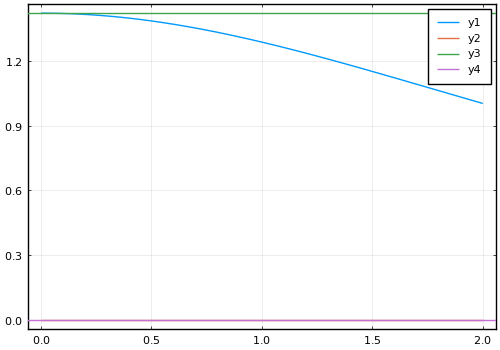

In [45]:
let E=3.875,p=qon_c(E)
    plot(q->real(potential_DnDsc(E,p, q; I=0, a=0,a1=0.0, cl=:ss)),0,2)
    plot!(q->imag(potential_DnDsc(E,p, q; I=0, a=0,a1=0.0, cl=:ss)),0,2)
    hline!([real(potential_DnDsc(E,p, p; I=0, a=0,a1=0.0, cl=:ss))])
    hline!([imag(potential_DnDsc(E,p, p; I=0, a=0,a1=0.0, cl=:ss))])
end

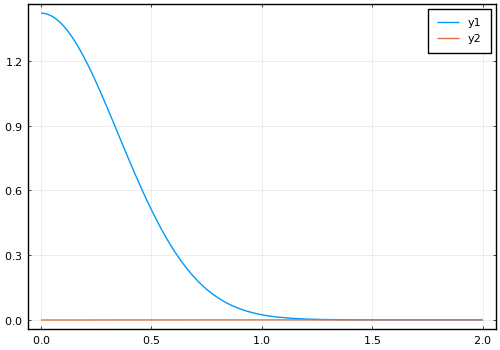

In [46]:
let E=3.875,p=qon_c(E),Λ=0.5
    plot(q->real(potential_DnDsc(E,p, q; I=0, a=0,a1=0.0, cl=:ss)*exp(-p^2/Λ^2-q^2/Λ^2)),0,2)
    plot!(q->imag(potential_DnDsc(E,p, q; I=0, a=0,a1=0.0, cl=:ss)*exp(-p^2/Λ^2-q^2/Λ^2)),0,2)
end

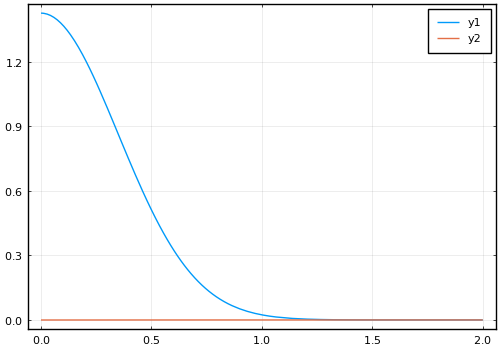

In [47]:
let E=mDn+mDsc-360e-6-im*24e-6,p=qon_c(E),Λ=0.5
    plot(q->real(potential_DnDsc(E,p, q; I=0, a=0,a1=0.0, cl=:ss)*exp(-p^2/Λ^2-q^2/Λ^2)),0,2)
    plot!(q->imag(potential_DnDsc(E,p, q; I=0, a=0,a1=0.0, cl=:ss)*exp(-p^2/Λ^2-q^2/Λ^2)),0,2)
end

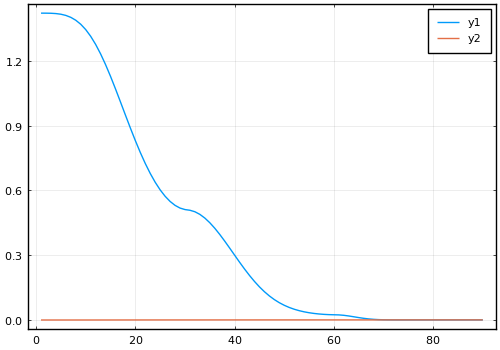

In [52]:
let E=3.875,p=qon_c(E),Λ=0.5
    plot(broadcast(q->real(potential_DnDsc(E,p, q; I=0, a=0,a1=0.0, cl=:ss)*exp(-p^2/Λ^2-q^2/Λ^2)),qi[3:end]))
    plot!(broadcast(q->imag(potential_DnDsc(E,p, q; I=0, a=0,a1=0.0, cl=:ss)*exp(-p^2/Λ^2-q^2/Λ^2)),qi[3:end]))
end